# Grid World  
- Each action is not entirely deterministic
    - 70% chance to go in desired direction
    - 10% chance for each of the 3 remaining directions

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class gridAgent(object):
    
    def __init__(self,neg,random_state=None):
        # ------Implement Later as variable size frame------
        self.height = 10
        self.width = 10
        #-------------------------
        self.num_neg = neg
        self.reset(random_state)
        
    
    def reset(self,random_state):
        self.isEnd = False
        self.path = []
        self.initialize_grid(self.num_neg, random_state)
        self.score = 0
        
        
    def initialize_grid(self,neg,random_state):
        n = 0
        
        if random_state:
            np.random.seed(random_state)
        
        # Select Positions
        coords = []
        while n < neg+2:
            [x,y] = (np.random.random(2)*10).astype(int)
            if not [x,y] in coords:
                coords.append([x,y])
                n += 1

        self.pos = coords.pop()
        self.path.append(self.pos[:])
        self.reward_pos = coords.pop()
        self.negs = coords


    def draw_grid(self, figsize=(6,5)):
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1,1,1)
        x = np.zeros((10,10,3))
        x[tuple([k[0] for k in grid.negs]),tuple([k[1] for k in grid.negs]),tuple([0 for _ in range(len(grid.negs))])] = 1
        x[(*grid.reward_pos,1)] = 1
        x[tuple([k[0] for k in grid.path]),tuple([k[1] for k in grid.path]),tuple([2 for _ in range(len(grid.path))])] = 1
        ax.imshow(x)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.scatter(*self.pos[::-1], s=50, marker='+',c='red')
        
        
    def move(self,direction):
        # Deterministic Input
        if direction == 'left' and self.pos[1] != 0:
            self.pos[1] -= 1
        elif direction == 'right' and self.pos[1] != 9:
            self.pos[1] += 1
        elif direction == 'up' and self.pos[0] != 0:
            self.pos[0] -= 1
        elif direction == 'down' and self.pos[0] != 9:
            self.pos[0] += 1
        else:
            pass  # Invalid Move
    
        self.path.append(self.pos[:])
        
        if self.pos in self.negs:
            self.score -= 1
        elif self.pos == self.reward_pos:
            self.score += 1
            self.end()
    
    
    def action(self, direction):
        # Introduces Stochastic element
        move_list = ['left','right','up','down']
        
        # If no movement request given, end game
        if not direction: 
            self.end()
            return
        
        # Otherwise, process input
        if np.random.random() <= 0.7:
            self.move(direction)
        else:
            move_list.remove(direction)
            self.move(np.random.choice(move_list))
    
    
    def policy(self):
        dist = np.array(self.reward_pos) - np.array(self.pos)
        if dist[1] > 0:
            move = 'right'
        elif dist[1] < 0:
            move = 'left'
        elif dist[0] > 0:
            move = 'down'
        elif dist[0] < 0:
            move = 'up'
        else: move = None;
            
        return move
    
    def end(self):
        self.isEnd = True
        print('---------------END---------------')
        print('Final Score:', self.score)
        

---------------END---------------
Final Score: 0


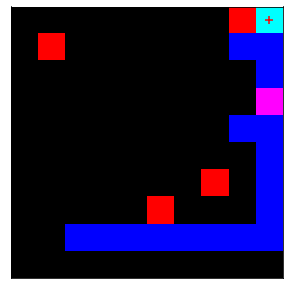

In [5]:
grid = gridAgent(5, random_state=42)
while not grid.isEnd:
    grid.action(grid.policy())
    
grid.draw_grid()